# Facebook Prophet 모델링
### 시계열 예측에 사용
### 참고사이트 : https://zzsza.github.io/data/2019/02/06/prophet/
### Prophet 구성 요소
1. Growth, Seasonality, Holidays
- y(t)=g(t)+s(t)+h(t)+error


In [1]:
### 필요 라이브러리 import
import datetime
import pandas as pd

In [2]:
#!conda install -c conda-forge fbprophet
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [3]:
### 데이터파일(csv)를 읽어와서 객체를 생성한다
df = pd.read_csv('data_gw_web_hit_20200811120003.csv')

In [4]:
df.head()

,ds,y
0,2020-07-28T12:00:00.000,688729
1,2020-07-28T12:10:00.000,604121
2,2020-07-28T12:20:00.000,572175
3,2020-07-28T12:30:00.000,537958
4,2020-07-28T12:40:00.000,533217


In [5]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [6]:
### 미래 트래픽 예측을 위해 예측기간(periods) 및 데이터 간격(freq)을 지정한다.
### 10분 간격으로 1440회 예측 실행(2주)
future = m.make_future_dataframe(periods=1440, freq='10min')
future.tail()

,ds
3452,2020-08-21 11:20:00
3453,2020-08-21 11:30:00
3454,2020-08-21 11:40:00
3455,2020-08-21 11:50:00
3456,2020-08-21 12:00:00


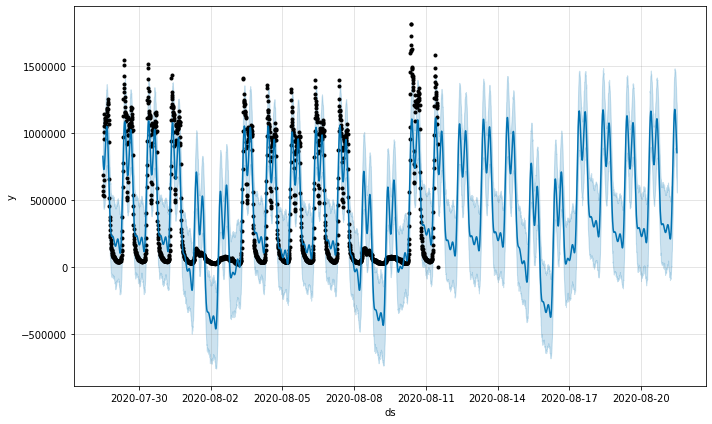

In [7]:
### 머신러닝을 수행하고 결과를 보여준다.
### 머신러닝 결과는 yhat, yhat_upper, yhat_lower 컬럼으로 나뉘어져 있으며 각각 예측치 평균, 최대 예측치, 최소 예측치를 의미한다.
forecast = m.predict(future)
fig1 = m.plot(forecast)

In [8]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-07-28 12:00:00,439675.205322,544330.019367,1.109738e+06,439675.205322,439675.205322,387362.833399,387362.833399,387362.833399,261861.574394,261861.574394,261861.574394,125501.259005,125501.259005,125501.259005,0.0,0.0,0.0,827038.038721
1,2020-07-28 12:10:00,439548.124852,515755.405672,1.096779e+06,439548.124852,439548.124852,359740.813557,359740.813557,359740.813557,235301.312820,235301.312820,235301.312820,124439.500737,124439.500737,124439.500737,0.0,0.0,0.0,799288.938409
2,2020-07-28 12:20:00,439421.044382,502229.271629,1.062748e+06,439421.044382,439421.044382,336069.033791,336069.033791,336069.033791,212683.367316,212683.367316,212683.367316,123385.666475,123385.666475,123385.666475,0.0,0.0,0.0,775490.078173
3,2020-07-28 12:30:00,439293.963912,452465.666181,1.041646e+06,439293.963912,439293.963912,316933.562410,316933.562410,316933.562410,194593.533740,194593.533740,194593.533740,122340.028670,122340.028670,122340.028670,0.0,0.0,0.0,756227.526322
4,2020-07-28 12:40:00,439166.883442,446350.573992,1.043318e+06,439166.883442,439166.883442,302785.863880,302785.863880,302785.863880,181483.009878,181483.009878,181483.009878,121302.854002,121302.854002,121302.854002,0.0,0.0,0.0,741952.747322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3452,2020-08-21 11:20:00,486211.274300,679704.962588,1.290699e+06,440679.307308,531961.714303,502226.227777,502226.227777,502226.227777,392004.242649,392004.242649,392004.242649,110221.985128,110221.985128,110221.985128,0.0,0.0,0.0,988437.502077
3453,2020-08-21 11:30:00,486271.273568,659515.304607,1.249235e+06,440697.499434,532074.779982,466946.385999,466946.385999,466946.385999,357648.456830,357648.456830,357648.456830,109297.929169,109297.929169,109297.929169,0.0,0.0,0.0,953217.659566
3454,2020-08-21 11:40:00,486331.272835,630316.675945,1.233168e+06,440715.691560,532187.845661,432232.719546,432232.719546,432232.719546,323883.804076,323883.804076,323883.804076,108348.915470,108348.915470,108348.915470,0.0,0.0,0.0,918563.992381
3455,2020-08-21 11:50:00,486391.272103,580161.358461,1.207665e+06,440733.883686,532300.911341,399033.116254,399033.116254,399033.116254,291658.373097,291658.373097,291658.373097,107374.743157,107374.743157,107374.743157,0.0,0.0,0.0,885424.388357


In [9]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
3447,2020-08-21 10:30:00,1.138876e+06,847548.178532,1.456851e+06
3448,2020-08-21 10:40:00,1.115355e+06,821674.202196,1.430027e+06
3449,2020-08-21 10:50:00,1.087654e+06,799500.968404,1.395577e+06
3450,2020-08-21 11:00:00,1.056638e+06,759413.767001,1.355576e+06
3451,2020-08-21 11:10:00,1.023241e+06,727335.250152,1.339781e+06
3452,2020-08-21 11:20:00,9.884375e+05,679704.962588,1.290699e+06
3453,2020-08-21 11:30:00,9.532177e+05,659515.304607,1.249235e+06
3454,2020-08-21 11:40:00,9.185640e+05,630316.675945,1.233168e+06
3455,2020-08-21 11:50:00,8.854244e+05,580161.358461,1.207665e+06
3456,2020-08-21 12:00:00,8.546881e+05,557011.659153,1.145436e+06
